Following IEOR E4703L Monte-Carlo Simulation handout from Columbia University (Martin Haugh)

In [1]:
import scipy 

import numpy as np
import matplotlib.pyplot as plt

In [13]:
hist_params = dict(alpha = 0.3, density=True)
hist_params

{'alpha': 0.3, 'density': True}

Beta Binomial - Is the coin fair?

In [44]:
flips = 20
heads = 8
true_p = 0.50

True Distribution of successes

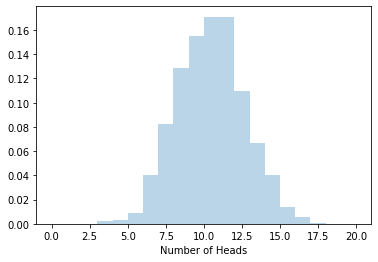

In [45]:
plt.hist(np.random.binomial(flips, true_p, size=1000), bins=np.arange(flips+1), **hist_params)
plt.xlabel('Number of Heads');

In [50]:
# weakly encode fairness of coin
prior_a = 2
prior_b = 2

In [51]:
posterior_p = np.random.beta(a=prior_a + heads, b=prior_b + (flips - heads), size=1000)

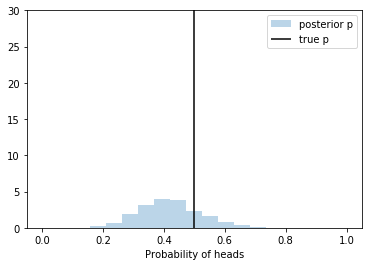

In [52]:
plt.hist(posterior_p, bins=np.linspace(0, 1, 20), label='posterior p', **hist_params)
plt.vlines(x=true_p, ymin=0, ymax=30, label='true p')
plt.ylim([0, 30])
plt.xlabel('Probability of heads')
plt.legend();

Text(0.5, 0, 'Number of Heads')

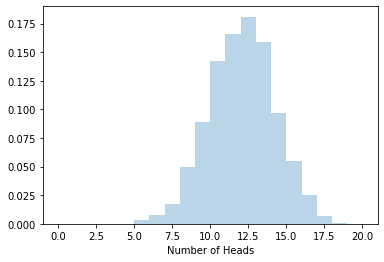

In [53]:
n_trials = 1000
total_heads = []

for _ in range(n_trials):
    new_flips   = np.array([np.random.random() > p for p in posterior_p[:flips]])
    trial_heads = np.sum(new_flips)
    total_heads += [trial_heads]
    
plt.hist(total_heads, bins=np.arange(flips+1), **hist_params)
plt.xlabel('Number of Heads')

Inference on a Gaussian of unknown mean, variance

In [78]:
true_mean, true_std = 90, 20
N = 50

observations = np.random.normal(true_mean, true_std, size=N)

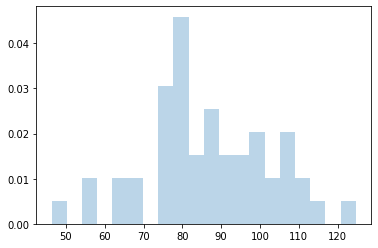

In [79]:
plt.hist(observations, bins=20, **hist_params);

In [83]:
prior_mean = 100
prior_var = 0.25 * (np.max(observations) - np.min(observations))

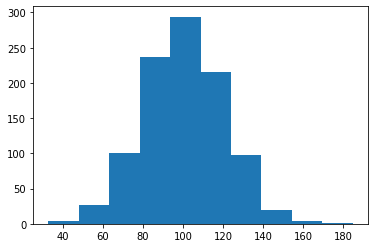

In [84]:
plt.hist(np.random.normal(prior_mean, prior_var, size=1000));